In [108]:
import pandas as pd
import numpy as np

In [109]:
import requests

def download (url, filename):
  response = requests.get(url, stream = True)
  if response.status_code == 200:
    with open(filename, 'wb') as f:
      for chunk in response.iter_content(chunk_size=8132):
        f.write(chunk)

In [110]:
file_path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv'

In [111]:
download(file_path, "auto.csv")

In [112]:
file_name = "auto.csv"

In [113]:
df = pd.read_csv(file_name)

In [114]:
# checking 1st 5 rows of dataframe
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [115]:
# I can see, there is no header so 1st I should add headers to this dataframe
# Here I am using a list to add headers
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", headers)

headers
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [116]:
# Now I am adding header
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [117]:
# We cn also check headers of dataframe with below code
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [118]:
#  In this dataframe there is some values with "?" symboles that is should be replca with NaN so we can handle missing values later in this project
df.replace('?', np.nan, inplace=True)

In [119]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [120]:
# In this project our target variable is price so, we should check if there is any missing values in price then we should drop that rows
# Using below code we can also check missing values in other columns(variables).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       202 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [121]:
#  from above code we get lot's of information about our dataframe, like numbers of columns = 28, data type of each columns, total entries = 204 from 0 to 203, there is few columns have null values with price also
# As we see price, there is 4 missing values so we can drop this 4 as rows
df.dropna(subset=['price'], axis = 0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       198 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  engine-size        200 non-null

In [122]:
#  After removing this 4 rows we can see there is 200 entries and 28 columns with 0 null values in price columns

In [123]:
# There is few more ways to identify missing values. they are .isnull(), .notnull()
missing_values = df.isnull()
missing_values.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [124]:
for column in missing_values.columns.values.tolist():
  # print(column)
  print(missing_values[column].value_counts())
  print("")

symboling
False    200
Name: count, dtype: int64

normalized-losses
False    164
True      36
Name: count, dtype: int64

make
False    200
Name: count, dtype: int64

fuel-type
False    200
Name: count, dtype: int64

aspiration
False    200
Name: count, dtype: int64

num-of-doors
False    198
True       2
Name: count, dtype: int64

body-style
False    200
Name: count, dtype: int64

drive-wheels
False    200
Name: count, dtype: int64

engine-location
False    200
Name: count, dtype: int64

wheel-base
False    200
Name: count, dtype: int64

length
False    200
Name: count, dtype: int64

width
False    200
Name: count, dtype: int64

height
False    200
Name: count, dtype: int64

curb-weight
False    200
Name: count, dtype: int64

engine-type
False    200
Name: count, dtype: int64

num-of-cylinders
False    200
Name: count, dtype: int64

engine-size
False    200
Name: count, dtype: int64

fuel-system
False    200
Name: count, dtype: int64

bore
False    196
True       4
Name: count, dtype: 

In [125]:
#   From above code it's so easy to get numbers of missing and not missing values.

#  The missing values are
# normalized-losses = 41 missing data
# stroke = 4 missing data
# bore = 4 missing data
# horsepower = 2 missing data
# peak-rpm = 2 missing data
# num-of-doors = 2 missing data

In [126]:
#  After indentify the missing values it's very important to handle missing data
#  there is Two ways to do this
# 1-Replace  Data by functions(mean, median, mode, frequency, std, etc,)
# 2-Drop Data (This, we already did with Target Variable("price"))

In [127]:
#  Before select fuction for replacing data we should get some more additional informaton
print(df.describe(include='all'))

         symboling normalized-losses    make fuel-type aspiration  \
count   200.000000               164     200       200        200   
unique         NaN                51      22         2          2   
top            NaN               161  toyota       gas        std   
freq           NaN                11      32       180        164   
mean      0.830000               NaN     NaN       NaN        NaN   
std       1.248557               NaN     NaN       NaN        NaN   
min      -2.000000               NaN     NaN       NaN        NaN   
25%       0.000000               NaN     NaN       NaN        NaN   
50%       1.000000               NaN     NaN       NaN        NaN   
75%       2.000000               NaN     NaN       NaN        NaN   
max       3.000000               NaN     NaN       NaN        NaN   

       num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
count           198        200          200             200  200.000000  ...   
unique     

In [128]:
# As we see normalized_losses, stroke, bore, horsepower and peak-rpm columns have int values but data type is objects therefore we should take mean of them and should change data type before mean for no error.

In [129]:
# Calculate the mean value for the "normalized-losses" column
avg_normalized_losses = df["normalized-losses"].astype("float").mean(axis=0)
avg_normalized_losses

# Replace "NaN" with mean value in "normalized-losses" column
df['normalized-losses'].replace(np.nan, avg_normalized_losses, inplace=True)

/tmp/ipython-input-3606866226.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['normalized-losses'].replace(np.nan, avg_normalized_losses, inplace=True)


In [130]:
# Calculate the mean value for the "stroke" column
avg_stroke = df['stroke'].astype("float").mean(axis=0)
avg_stroke

# Replace "NaN" with the mean value in the "stroke" column
df['stroke'].replace(np.nan, avg_stroke, inplace=True)

/tmp/ipython-input-3427903295.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stroke'].replace(np.nan, avg_stroke, inplace=True)


In [131]:
# Calculate the mean value for the "bore" column
avg_bore = df['bore'].astype("float").mean(axis=0)
avg_bore

# Replace "NaN" with the mean value in the "bore" column
df['bore'].replace(np.nan, avg_bore, inplace=True)

/tmp/ipython-input-1466732896.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bore'].replace(np.nan, avg_bore, inplace=True)


In [132]:
# Calculate the mean value for the "horsepower" column
avg_horsepower = df['horsepower'].astype("float").mean(axis=0)
avg_horsepower

# Replace "NaN" with the mean value in the "horsepower" column
df['horsepower'].replace(np.nan,avg_horsepower, inplace=True)

/tmp/ipython-input-1677079815.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].replace(np.nan,avg_horsepower, inplace=True)


In [133]:
# Calculate the mean value for "peak-rpm" column
Avg_peak_rpm = df['peak-rpm'].astype("float").mean(axis=0)
Avg_peak_rpm

# Replace "NaN" with the mean value in the "peak-rpm" column
df['peak-rpm'].replace(np.nan, Avg_peak_rpm, inplace = True)

/tmp/ipython-input-3880259683.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['peak-rpm'].replace(np.nan, Avg_peak_rpm, inplace = True)


In [134]:
#  In num-of-doors there object data type and only 2 unique values therefore using frequency

In [135]:
#replace the missing 'num-of-doors' values by the most frequent
# df['num-of-doors'].value_counts()
frq_NOD = df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'].replace(np.nan,frq_NOD, inplace=True)

/tmp/ipython-input-2136155607.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num-of-doors'].replace(np.nan,frq_NOD, inplace=True)


In [136]:
# reset index, because we droped rows
df.reset_index(drop=True, inplace=True)

In [137]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [138]:
# Now we need to correct the data formate because they are not in correct form. As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, the numerical values 'bore' and 'stroke' describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. we have to convert data types into a proper format for each column using the "astype()" method.

In [139]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [140]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  200 non-null    int64  
 2   make               200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  engine-size        200 non

In [141]:
# There is few columns that are not in standard form so we 1st make it standard by standardization
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

df['highway-L/100km'] = 235/df['highway-mpg']

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,3.19,3.40,8.5,110,5500.0,19,25,15250.0,12.368421,9.400000


In [142]:
df[['length','width','height']].head(10)

,length,width,height
0,168.8,64.1,48.8
1,171.2,65.5,52.4
2,176.6,66.2,54.3
3,176.6,66.4,54.3
4,177.3,66.3,53.1
5,192.7,71.4,55.7
6,192.7,71.4,55.7
7,192.7,71.4,55.9
8,176.8,64.8,54.3
9,176.8,64.8,54.3


In [143]:
# Normalization is the process of transforming values of several variables into a similar range
# To demonstrate normalization, say we want to scale the columns "length", "width" and "height".
# normalize those variables so their value ranges from 0 to 1

In [144]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

In [145]:
df[['length','width','height']].head(10)

,length,width,height
0,0.811148,0.890278,0.816054
1,0.822681,0.909722,0.876254
2,0.848630,0.919444,0.908027
3,0.848630,0.922222,0.908027
4,0.851994,0.920833,0.887960
5,0.925997,0.991667,0.931438
6,0.925997,0.991667,0.931438
7,0.925997,0.991667,0.934783
8,0.849592,0.900000,0.908027
9,0.849592,0.900000,0.908027


In [146]:
# Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
# In our data set, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values.
# What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? we can rearrange them into three ‘bins' to simplify analysis.
# We csn use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins.

Text(0.5, 1.0, 'horsepower bins')

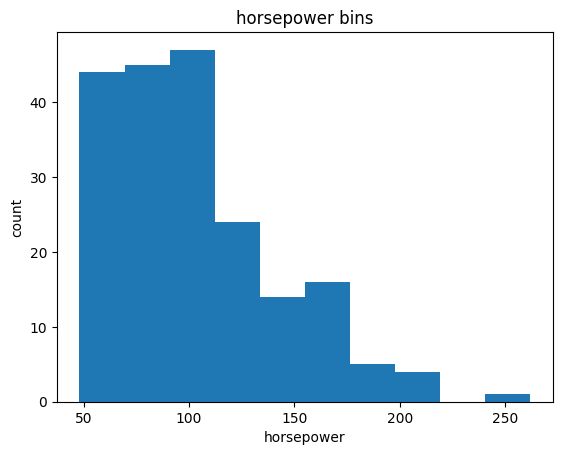

In [147]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [148]:
#  We can see need above graph there is 3 part
# Since we are building 3 bins of equal length, we need 4 dividers, so numbers_generated = 4.
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [149]:
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111,Low
1,154,Medium
2,102,Low
3,115,Low
4,110,Low
5,110,Low
6,110,Low
7,140,Medium
8,101,Low
9,101,Low


In [150]:
# To see the number of vehicles in each bin
df["horsepower-binned"].value_counts()

,count
horsepower-binned,
Low,152
Medium,43
High,5


Text(0.5, 1.0, 'horsepower bins')

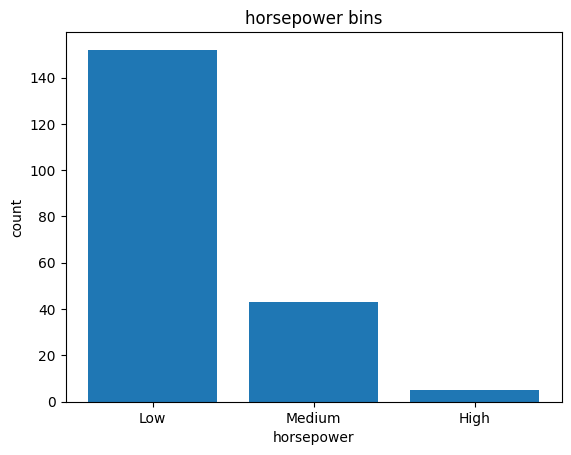

In [151]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [152]:
# An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.
# We use indicator variables so we can use categorical variables for regression analysis in the later modules.
# The column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we can convert "fuel-type" to indicator variables.
# Use the Panda method 'get_dummies' to assign numerical values to different categories of fuel type.

In [153]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [154]:
# Change the column names for clarity:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
# Convert boolean to integer (0 or 1)
dummy_variable_1['fuel-type-gas'] = dummy_variable_1['fuel-type-gas'].astype(int)
dummy_variable_1['fuel-type-diesel'] = dummy_variable_1['fuel-type-diesel'].astype(int)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [155]:
# In the data frame, column 'fuel-type' now has values for 'gas' and 'diesel' as 0s and 1s.

# merge data frame "df" and "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [156]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,110,5500.0,19,25,15250.0,12.368421,9.400000,Low,0,1


# EDA - Exploratory Data Analysis

1.   Import Data from Module
2.   Analyzing Individual Feature Patterns using Visualization
3.   Descriptive Statistical Analysis
4.   Basics of Grouping
5.   Correlation and Causation

This topic comes under EDA where we already did 1, and 3, Now see 2, 4 and 5.

In [157]:
# Before making model we need to find feature that can help to make our model more accurate.
# For that we can find correlation via graph or use .corr() function for numerical variables

# 1. Numerical Variables

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas
symboling,1.000000,0.469772,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.145667,0.008244,-0.181073,0.074581,0.284011,-0.030158,0.041248,-0.083327,0.062423,-0.033159,-0.195381,0.195381
normalized-losses,0.469772,1.000000,-0.057068,0.019433,0.086961,-0.377664,0.099404,0.112362,-0.029867,0.055759,-0.114738,0.217323,0.239580,-0.225255,-0.182011,0.133999,0.238712,0.181247,-0.101574,0.101574
wheel-base,-0.529145,-0.057068,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.501534,0.144675,0.249689,0.375732,-0.364971,-0.480029,-0.552211,0.589147,0.484047,0.584953,0.306706,-0.306706
length,-0.364511,0.019433,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.610817,0.120888,0.159203,0.580477,-0.286754,-0.667658,-0.700186,0.691044,0.659174,0.708466,0.210616,-0.210616
width,-0.237262,0.086961,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.548478,0.182855,0.189008,0.617032,-0.247388,-0.638155,-0.684700,0.752795,0.677111,0.739845,0.243448,-0.243448
height,-0.542261,-0.377664,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.187794,-0.081273,0.259526,-0.085725,-0.315756,-0.057087,-0.111568,0.137284,0.008923,0.088903,0.281198,-0.281198
curb-weight,-0.234743,0.099404,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.644532,0.168642,0.156444,0.758095,-0.279411,-0.750390,-0.795515,0.834420,0.785868,0.837217,0.221082,-0.221082
engine-size,-0.112069,0.112362,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.572786,0.208004,0.029005,0.822656,-0.256702,-0.651002,-0.679877,0.872337,0.745337,0.783593,0.070925,-0.070925
bore,-0.145667,-0.029867,0.501534,0.610817,0.548478,0.187794,0.644532,0.572786,1.000000,-0.051087,0.002021,0.566690,-0.267010,-0.581365,-0.590753,0.543431,0.554069,0.558759,0.055371,-0.055371
stroke,0.008244,0.055759,0.144675,0.120888,0.182855,-0.081273,0.168642,0.208004,-0.051087,1.000000,0.186761,0.100351,-0.066173,-0.040677,-0.040282,0.083296,0.041470,0.051148,0.240013,-0.240013


In [160]:
# From above correlation chart we can easily find that wheel-base is 58% correlated with target variable "price".
# As well as length is 69%, width is 75%, curb-weight is 83%, engine-size is 87%, bore is 54%, horsepower is 80%, city-mpg is 68%, highway-mpg is 70%, city-L/100km is 79% and highway-L/100km is 80% correlated with "price".
# This relation tell you which variable is more reliable for model developing to get more accurate prediction.

In [161]:
# Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.
# In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data. This will be useful later on for visualizing the fit of the simple linear regression model as well.

(0.0, 52773.044940482105)

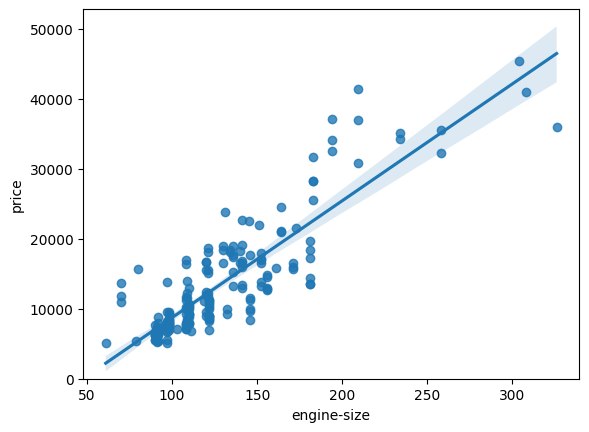

In [162]:
# Positive Linear Relationship
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [163]:
# As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872337
price,0.872337,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

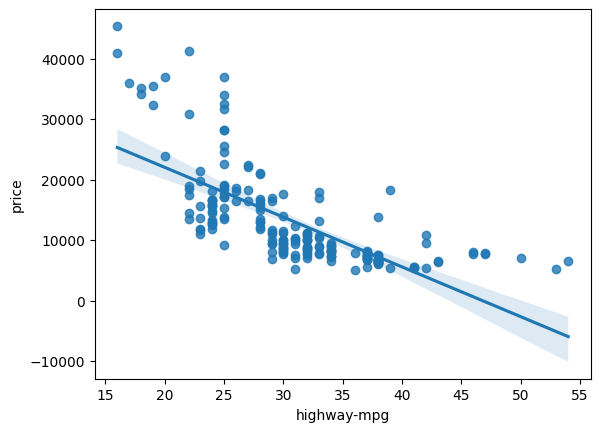

In [164]:
# Negative Linear Relationship
# Highway mpg is a potential predictor variable of price. Let's find the scatterplot of "highway-mpg" and "price".
sns.regplot(x="highway-mpg", y="price", data=df)

In [165]:
# As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.705115
price,-0.705115,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

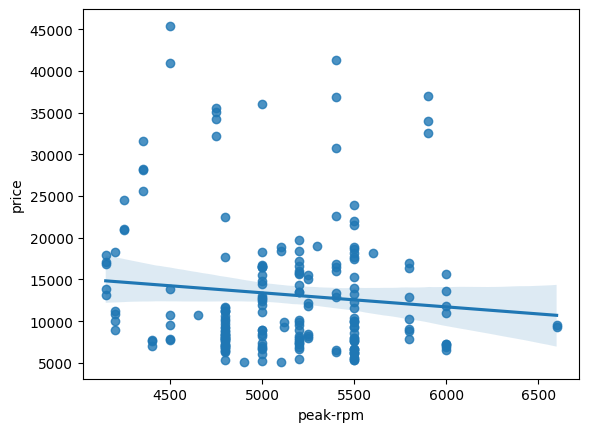

In [166]:
# Weak Linear Relationship
# Let's see if "peak-rpm" is a predictor variable of "price".
sns.regplot(x="peak-rpm", y="price", data=df)

In [167]:
# Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101519
price,-0.101519,1.000000


<Axes: xlabel='stroke', ylabel='price'>

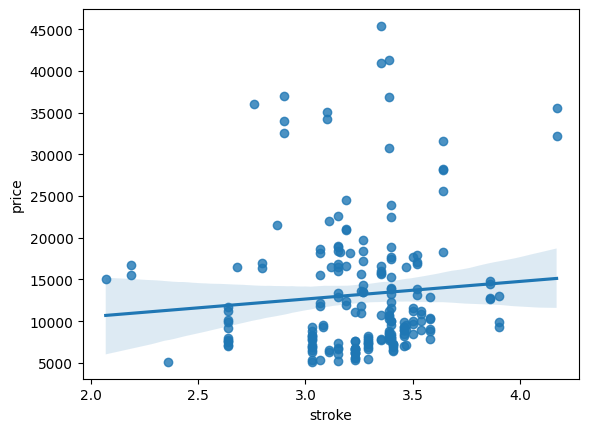

In [168]:
#  The correlation between x="stroke" and y="price".
sns.regplot(x="stroke", y="price", data=df)

In [169]:
#There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well. We can see this using .corr() to demonstrate this.
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.083296
price,0.083296,1.000000


# 2. Categorical Variables

In [170]:
# These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

<Axes: xlabel='body-style', ylabel='price'>

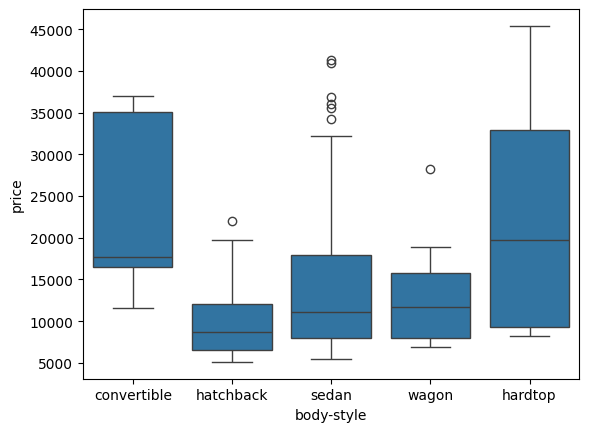

In [171]:
# Let's look at the relationship between "body-style" and "price".
sns.boxplot(x="body-style", y="price", data=df)

<Axes: xlabel='engine-location', ylabel='price'>

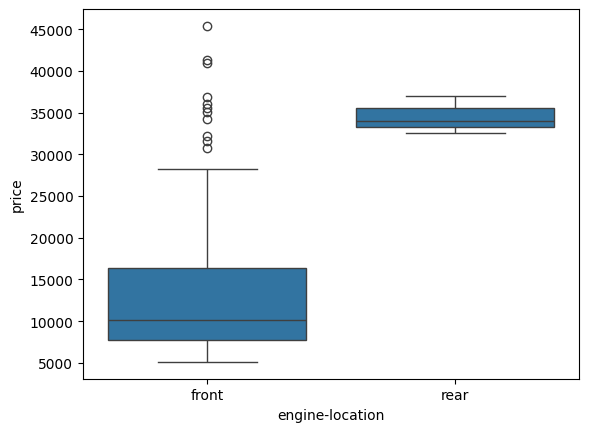

In [172]:
# We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price.
# Let's examine engine "engine-location" and "price":
sns.boxplot(x="engine-location", y="price", data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

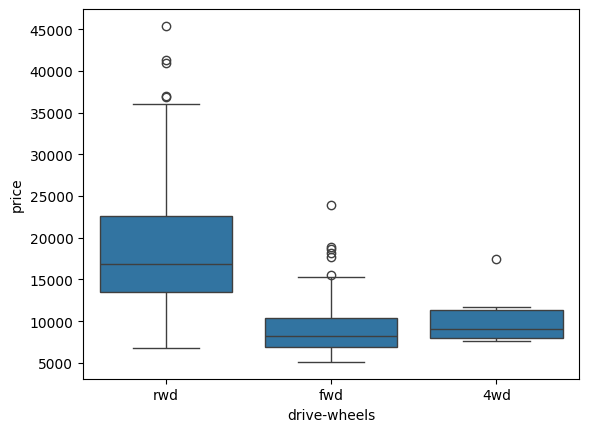

In [173]:
# Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

# Let's examine "drive-wheels" and "price".
sns.boxplot(x="drive-wheels", y="price", data=df)

In [174]:
# Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

In [175]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,200,200,200,200,200,200,200,200,200
unique,22,2,2,5,3,2,6,7,8
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,164,115,94,118,197,145,156,91


In [176]:
df['drive-wheels'].value_counts()

,count
drive-wheels,
fwd,118
rwd,74
4wd,8


In [177]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,74
4wd,8


In [178]:
# We can repeat the above process for the variable 'engine-location'.
engine_location_count = df['engine-location'].value_counts().to_frame()
engine_location_count.reset_index(inplace=True)
engine_location_count=engine_location_count.rename(columns={'engine-location': 'value_counts'})
engine_location_count.index.name = 'engine-location'
engine_location_count

,value_counts,count
engine-location,,
0,front,197
1,rear,3


## ***3. Basics of Grouping***

In [179]:
# The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.

# For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [180]:
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one

,drive-wheels,body-style,price
0,rwd,convertible,16500.0
1,rwd,hatchback,16500.0
2,fwd,sedan,13950.0
3,4wd,sedan,17450.0
4,fwd,sedan,15250.0
...,...,...,...
195,rwd,sedan,16845.0
196,rwd,sedan,19045.0
197,rwd,sedan,21485.0
198,rwd,sedan,22470.0


In [181]:
# grouping results
df_grouped = df_group_one.groupby(['drive-wheels'], as_index=False).agg({'price': 'mean'})
df_grouped

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19842.243243


In [182]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).agg({'price':'mean'})
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


In [183]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [184]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                 0.00      0.000000   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [185]:
# Using the "groupby" function to find the average "price" of each car based on "body-style".
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df.groupby(['body-style'],as_index= False).agg({'price':'mean'})
grouped_test_bodystyle

,body-style,price
0,convertible,23569.600000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [186]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,110,5500.0,19,25,15250.0,12.368421,9.400000,Low,0,1


In [187]:
# Now this is the time for creating models for ML.

# 1. Linear Regression and Multiple Linear Regression

In [188]:
# Let's load the modules for linear regression
from sklearn.linear_model import LinearRegression

In [189]:
# Now create the linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [190]:
# Let's find how could "highway-mpg" help us predict car price.
X = df[['highway-mpg']]
Y = df['price']

In [191]:
# Fitting the linear model using highway-mpg
lm.fit(X,Y)

LinearRegression()

In [192]:
# We can output a prediction
Yhat=lm.predict(X)
Yhat[0:5]

array([16254.26934067, 17077.0977727 , 13785.78404458, 20368.41150083,
       17899.92620473])

In [193]:
# As we see this output shows in array
# Here we can find intercept and slop because of this is a linear model where prediction is done in y = Mx + C
# Where y is dependent variable and x in independent variable and M, C are constant. M called slop or coefficiant , C called intercept

In [194]:
# Let's find coefficient and intercept of this model
print("The coefficient is: ",lm.coef_)
print("The intercept is: ",lm.intercept_)

The coefficient is:  [-822.82843203]
The intercept is:  38470.63700549667


In [195]:
# Now we can also create another model with lm1 to train it with  "engine-size" as the independent variable and "price" as the dependent variable
lm1 = LinearRegression()
lm1

LinearRegression()

In [196]:
X = df[['engine-size']]
Y = df['price']
lm1.fit(X,Y)

LinearRegression()

In [197]:
print("Intercept: ",lm1.intercept_)
print("Slope: ",lm1.coef_)

Intercept:  -7962.4409791630915
Slope:  [166.8621392]


In [198]:
# We can also see how our model is fit with independent variable to predict outcomes
print(lm1.score(X, Y))

0.7609714051425502


In [201]:
# Here we can see our model is 76.09% correct which means ther eis still neads more accuracy in prediction.

# 2. Multiple Linear Regression

In [202]:
# From the above's we know that other good predictors of price could be ( Horsepower, Curb-weight, Engine-size, Highway-mpg)
# Let's develop a model using these variables as the predictor variables.
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
# Fit the linear model using the four above-mentioned variables.
lm.fit(Z, df[['price']])

LinearRegression()

In [203]:
print("Intercept: ",lm.intercept_)
print("Slope: ",lm.coef_)

Intercept:  [-15814.43913901]
Slope:  [[53.64350321  4.70621169 81.46397065 36.26760488]]


In [204]:
#  We can see there is 4 variable and there is 4 corresponding slops

# 3. Polynomial Regression and Pipelines

In [205]:
from sklearn.preprocessing import PolynomialFeatures

In [206]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [207]:
Z_pr=pr.fit_transform(Z)

Pipeline

In [209]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [210]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [211]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [213]:
Z = Z.astype(float)
pipe.fit(Z,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [214]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13095.64294486, 18226.1683919 , 10389.2689322 , 16122.24836083])

In [215]:
pipe.score(Z,Y)

0.8463645656564276

In [216]:
# This is accurate then previous model